Importation des Librairies

In [11]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import re
import os
import seaborn as sns
import warnings

Chargement du Fichier CSV

In [12]:
data = pd.read_csv("src/fraud test.csv")

Compréhension des Données 

In [13]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [14]:
# suppression des features non intéréssantes 
""" COLONNES PAS INTÉRESSANTES

to_drop : 
Cc_num:Unique customer identification number.
First: Cardholder's first name.
Last Cardholder's last name.
Street: Cardholder's street address.
City: Cardholder's city of residence.
State: Cardholder's state of residence.
Zip: Cardholder's zip code.
Trans_num: Unique transaction identifier."""

" COLONNES PAS INTÉRESSANTES\n\nto_drop : \nCc_num:Unique customer identification number.\nFirst: Cardholder's first name.\nLast Cardholder's last name.\nStreet: Cardholder's street address.\nCity: Cardholder's city of residence.\nState: Cardholder's state of residence.\nZip: Cardholder's zip code.\nTrans_num: Unique transaction identifier."

In [15]:
# Obtenir des informations sur les types de données et les dimensions
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [16]:
# Echantillonage de Données

sample = data.sample(frac=0.001)
print(sample)

        Unnamed: 0 trans_date_trans_time        cc_num  \
153789      153789      14/08/2020 04:35  6.592240e+15   
46740        46740      07/07/2020 04:31  3.597340e+15   
328981      328981      25/10/2020 15:03  3.506040e+15   
317022      317022      19/10/2020 20:28  3.044240e+13   
67143        67143      14/07/2020 07:49  3.710090e+14   
...            ...                   ...           ...   
135467      135467      07/08/2020 21:18  6.304250e+11   
427383      427383      03/12/2020 16:29  3.712260e+14   
142629      142629      10/08/2020 07:24  1.800940e+14   
262775      262775      26/09/2020 14:22  3.521820e+15   
121657      121657      02/08/2020 23:58  4.687260e+12   

                                     merchant       category     amt  \
153789     fraud_Swift, Bradtke and Marquardt    grocery_net   46.49   
46740        fraud_Stroman, Hudson and Erdman  gas_transport   33.94   
328981                      fraud_Gerhold LLC           home   30.28   
317022         

In [17]:
# Identification des valeurs nulles

nombre_valeurs_nulles_par_colonne = data.isnull().sum()

In [18]:
# Affichage des valeurs nulles

print(nombre_valeurs_nulles_par_colonne)

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


Masque de la colonne " is fraud "

In [21]:
fraud_mask = ((data['is_fraud'] == 1))
dfm = data[(fraud_mask)]
dfm.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1685,1685,21/06/2020 22:06,3.560730e+15,fraud_Hamill-D'Amore,health_fitness,24.84,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,15/09/1969,16bf2e46c54369a8eab2214649506425,1371852399,32.575873,-102.604290,1
1767,1767,21/06/2020 22:32,6.564460e+15,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.52,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,42.5545,-90.3508,1306,Public relations officer,10/09/1958,ab4b379d2c0c9c667d46508d4e126d72,1371853942,42.461127,-91.147148,1
1781,1781,21/06/2020 22:37,6.564460e+15,fraud_Nienow PLC,entertainment,620.33,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,42.5545,-90.3508,1306,Public relations officer,10/09/1958,47a9987ae81d99f7832a54b29a77bf4b,1371854247,42.771834,-90.158365,1
1784,1784,21/06/2020 22:38,4.005680e+15,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.69,William,Perry,M,458 Phillips Island Apt. 768,...,30.4590,-90.9027,71335,Herbalist,31/05/1994,fe956c7e4a253c437c18918bf96f7b62,1371854335,31.204974,-90.261595,1
1857,1857,21/06/2020 23:02,3.560730e+15,fraud_Hermann and Sons,shopping_pos,842.65,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,15/09/1969,f6838c01f5d2262006e6b71d33ba7c6d,1371855736,31.315782,-102.736390,1


In [22]:
dfm.shape

(2145, 23)

Analyse Univariée

In [ ]:
# 

print(data.describe())

          Unnamed: 0        cc_num            amt            zip  \
count  555719.000000  5.557190e+05  555719.000000  555719.000000   
mean   277859.000000  4.178387e+17      69.392810   48842.628015   
std    160422.401459  1.309837e+18     156.745941   26855.283328   
min         0.000000  6.041621e+10       1.000000    1257.000000   
25%    138929.500000  1.800430e+14       9.630000   26292.000000   
50%    277859.000000  3.521420e+15      47.290000   48174.000000   
75%    416788.500000  4.635330e+15      83.010000   72011.000000   
max    555718.000000  4.992350e+18   22768.110000   99921.000000   

                 lat           long      city_pop     unix_time  \
count  555719.000000  555719.000000  5.557190e+05  5.557190e+05   
mean       38.543253     -90.231325  8.822189e+04  1.380679e+09   
std         5.061336      13.721780  3.003909e+05  5.201104e+06   
min        20.027100    -165.672300  2.300000e+01  1.371817e+09   
25%        34.668900     -96.798000  7.410000e+02  1

In [ ]:
# 1) Sélection de la variable / colonne à analyser parmis les features importants


colonne = data['nom_colonne']

In [ ]:
# 2) Calculer les statistiques descriptives de la colonne


statistiques_descriptives = colonne.describe()
print(statistiques_descriptives)

In [ ]:
# 3) Visualisation de la distribution via le traçage d'un histogramme
# histogramme uniquement pour les catégorielles


plt.hist(data["colonne"], bins=10)  # Nombre de bacs peut être ajusté selon les besoins pour mieux vuzualiser l'histogramme
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')
plt.title('Histogramme de la colonne')
plt.show()

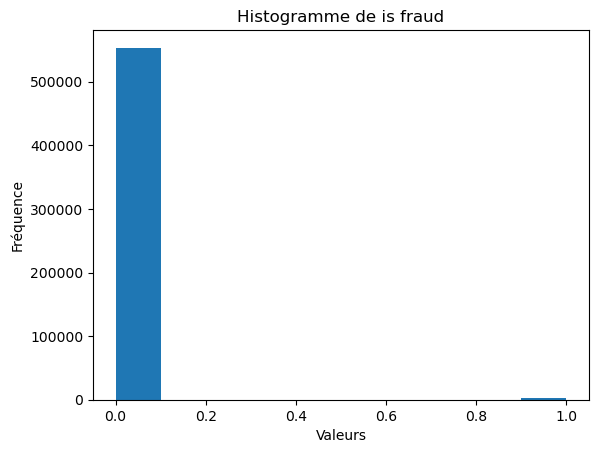

In [23]:
plt.hist(data["is_fraud"])  # Nombre de bacs peut être ajusté selon les besoins pour mieux vuzualiser l'histogramme
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')
plt.title('Histogramme de is fraud')
plt.show()

In [ ]:
# Visualiser la distribution des variables

import matplotlib.pyplot as plt
data['colonne'].hist()
plt.show()

In [ ]:
# 3b) faire un boxplot

Analyse Bivariée

In [ ]:
# 1) Sélection des variables / colonnes à comparer


colonne1 = data['nom_colonne1']
colonne2 = data['nom_colonne2']

In [ ]:
# 2)  Calculer la corrélation entre les deux colonnes


correlation = colonne1.corr(colonne2)
print("Corrélation entre les deux colonnes :", correlation)

In [ ]:
# 3) Créer un tableau croisé dynamique


tableau_croise = pd.crosstab(colonne1, colonne2)

# Tracer un graphique à barres
tableau_croise.plot(kind='bar')
plt.xlabel('Nom de la colonne 1')
plt.ylabel('Fréquence')
plt.title('Graphique à barres pour les deux colonnes')
plt.legend(title='Nom de la colonne 2')
plt.show()

Aanalyse Multivariée

In [ ]:
# Identifier les noms des colonnes (features)

features = data.columns.tolist()
print("Features:", features)

Features: ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']


In [ ]:
# Identification de la Colonne Target 
# Sélectionner la colonne de la variable cible

target_column = 'is_fraud'
target = data[target_column]